# Tutoriel: Algorithme PCA (Analyse en Composantes Principales)

Dans ce notebook, nous allons explorer l'algorithme de l'Analyse en Composantes Principales (PCA), qui est une méthode statistique permettant de réduire la dimensionnalité des données tout en préservant autant que possible la variance des données. Nous plongerons dans les détails mathématiques avant de mettre en œuvre l'algorithme avec du code.


## Introduction à PCA

L'objectif principal de la PCA est de transformer un ensemble de variables possiblement corrélées en un nouvel ensemble de variables appelées composantes principales. Ces composantes sont non corrélées et ordonnées de telle manière que la première composante principale conserve la plus grande partie de la variance des données originales.

Pour comprendre cela, imaginez que vous avez un nuage de points dans un espace à trois dimensions. Ce nuage pourrait être "aplati" de telle manière qu'il soit projeté sur un plan à deux dimensions sans beaucoup perdre d'informations. PCA trouve ce plan qui maximise la variance des données projetées.

## Fondements Mathématiques de PCA

Supposons que nous ayons un ensemble de données `X` de dimension `[n_samples, n_features]`, et nous voulons réduire la dimensionnalité à `k` composantes principales.

### Étape 1: Normalisation des données

Avant de commencer, il est important de centrer et de normaliser les données en soustrayant la moyenne et en divisant par l'écart-type pour chaque variable. Cela évite que les variables avec de plus grandes échelles dominent les composantes principales.

In [ ]:
import numpy as np

def normaliser_donnees(X):
    # Moyenne de chaque caractéristique
    moyennes = np.mean(X, axis=0)
    # Écart type de chaque caractéristique
    ecarts_types = np.std(X, axis=0)
    # Normalisation
    X_norm = (X - moyennes) / ecarts_types
    return X_norm

###Étape 2: Calcule du matrice covariance
La formule de la covariance entre deux variables \(X\) et \(Y\) est donnée par :

$$ \text{cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n-1} $$

où :
- ${cov}(X, Y)$ est la covariance entre \(X\) et \(Y\),
- $X_i$ et $Y_i$ sont les observations individuelles des variables \(X\) et \(Y\),
- $\bar{X}$ et $\bar{Y} sont les moyennes respectives de \(X\) et \(Y\),
- n est le nombre d'observations.



In [ ]:
def matrice_covariance(X):
    return np.cov(X.T)

### Étape 3: Calcul des vecteurs et valeurs propres

La prochaine étape est de calculer les vecteurs propres et les valeurs propres de la matrice de covariance. Les vecteurs propres correspondent à la direction des axes sur lesquels les données seront projetées, tandis que les valeurs propres correspondent à la quantité de variance que chaque axe principal porte.

In [ ]:
def valeurs_vecteurs_propres(cov_matrix):
    return np.linalg.eigh(cov_matrix)

### Étape 4: Sélection des composantes principales

Les `k` vecteurs propres qui correspondent aux `k` plus grandes valeurs propres sont sélectionnés. Ces vecteurs définissent les directions des composantes principales.

In [ ]:
def composants_principaux(val_propres, vec_propres, k):
    # Trier les vecteurs propres par ordre décroissant des valeurs propres
    indices_tries = np.argsort(val_propres)[::-1]
    return vec_propres[:, indices_tries[:k]]

### Étape 5: Projection des données

Finalement, les données originales sont projetées sur l'espace des composantes principales en utilisant les vecteurs propres sélectionnés.

In [ ]:
def projection(X, W):
    return np.dot(X, W)

## Exemple Illustratif

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### Implémentation de PCA en Python

Commençons par l'implémentation pas à pas de PCA en Python.


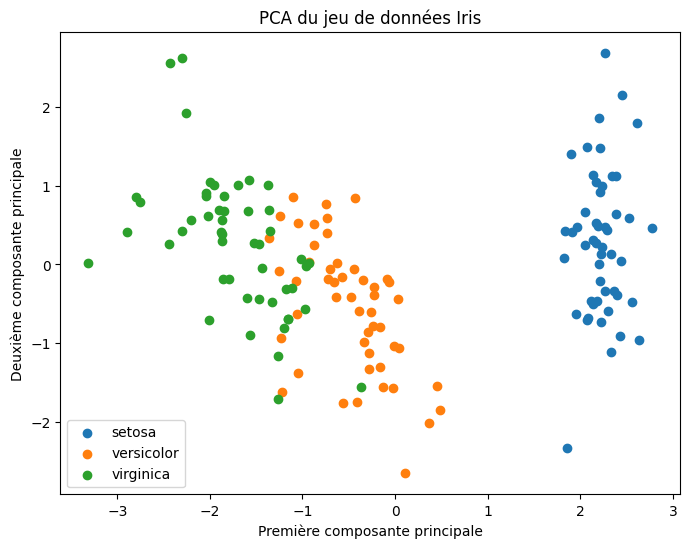

In [ ]:
# Charger les données
iris = load_iris()
X = iris.data
y = iris.target

# Normalisation des données
X_scaled = normaliser_donnees(X)

# Calculer la matrice de covariance
cov_matrix = matrice_covariance(X_scaled)

# Obtenir les valeurs et vecteurs propres
val_propres, vec_propres = valeurs_vecteurs_propres(cov_matrix)

# Choisir les composants principaux (ici 2 pour simplifier)
W = composants_principaux(val_propres, vec_propres, k=2)

# Projeter les données
X_proj = projection(X_scaled, W)

# Afficher les données transformées
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_proj[y == i, 0], X_proj[y == i, 1], label=target_name)
plt.legend()
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('PCA du jeu de données Iris')
plt.show()

En exécutant le code ci-dessus, vous obtiendrez une visualisation montrant comment les données Iris sont distribuées le long des deux premières composantes principales.





## Conclusion

Dans ce notebook, nous avons vu comment fonctionne l'algorithme PCA, ses bases mathématiques et comment l'appliquer à un ensemble de données réel. L'utilisation de la PCA vous permet de compresser vos données en préservant autant d'informations que possible, ce qui peut être utile pour la visualisation, ou comme étape préliminaire à d'autres tâches de machine learning.